In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB2

NUM_CLASSES = 2
IMG_SIZE = 260
size = (IMG_SIZE, IMG_SIZE)

inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

#Using model without transfer learning

outputs = EfficientNetB2(include_top = True, weights = None, classes=NUM_CLASSES)(inputs)

In [3]:
model = tf.keras.Model(inputs, outputs)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 260, 260, 3)]     0         
                                                                 
 efficientnetb2 (Functional)  (None, 2)                7771387   
                                                                 
Total params: 7,771,387
Trainable params: 7,703,812
Non-trainable params: 67,575
_________________________________________________________________


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [5]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Projects/DeepLearning/BreastCancer/Dataset_2000/train',
                                                 target_size = (IMG_SIZE, IMG_SIZE),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Projects/DeepLearning/BreastCancer/Dataset_2000/valid',
                                            target_size = (IMG_SIZE, IMG_SIZE),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2000 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [6]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=35,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  shuffle = True
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/35
63/63 [==============================] - 139s 2s/step - loss: 2.6929 - accuracy: 0.6365 - val_loss: 0.7086 - val_accuracy: 0.5000
Epoch 2/35
63/63 [==============================] - 112s 2s/step - loss: 1.2340 - accuracy: 0.7265 - val_loss: 0.6975 - val_accuracy: 0.5000
Epoch 3/35
63/63 [==============================] - 112s 2s/step - loss: 0.9231 - accuracy: 0.7925 - val_loss: 0.7236 - val_accuracy: 0.5000
Epoch 4/35
63/63 [==============================] - 112s 2s/step - loss: 0.7245 - accuracy: 0.8045 - val_loss: 0.7037 - val_accuracy: 0.5000
Epoch 5/35
63/63 [==============================] - 112s 2s/step - loss: 0.5312 - accuracy: 0.8215 - val_loss: 0.9858 - val_accuracy: 0.5000
Epoch 6/35
63/63 [==============================] - 112s 2s/step - loss: 0.3999 - accuracy: 0.8365 - val_loss: 1.3683 - val_accuracy: 0.5000
Epoch 7/35
63/63 [==============================] - 112s 2s/step - loss: 0.3814 - accuracy: 0.8360 - val_loss: 0.7628 - val_accuracy: 0.5000
Epoch 8/35
63

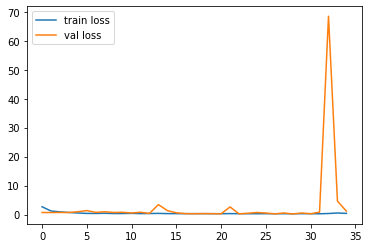

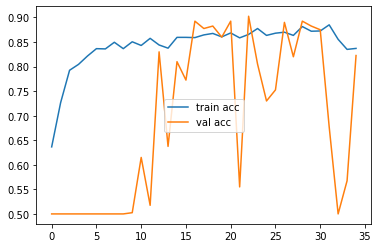

<Figure size 432x288 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')